In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

## 1. 데이터 로드

In [3]:
data = fetch_california_housing()
X = data.data # 입력 변수 가져옴
y = data.target # 예측해야 할 값

In [4]:
print(X)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


## 2. 데이터를 학습용과 테스트용으로 나누기

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
    # 데이터 80%는 학습용으로 사용, 20%는 테스트 데이터로 분리해서 모델 성능 평가에 사용하기 위한 데이터셋 설정
)


## 3. 데이터 정규화(스케일링)

In [6]:
scaler = StandardScaler() # 평균 0, 표준편차 1로 변환하기 위한 스케일러 객체 생성
X_train = scaler.fit_transform(X_train) # 학습 데이터를 기준으로 스케일을 맞추고 반환
X_test = scaler.transform(X_test) # 테스트 데이터도 가튼 기준으로 변환

print(X_train)

[[-0.326196    0.34849025 -0.17491646 ...  0.05137609 -1.3728112
   1.27258656]
 [-0.03584338  1.61811813 -0.40283542 ... -0.11736222 -0.87669601
   0.70916212]
 [ 0.14470145 -1.95271028  0.08821601 ... -0.03227969 -0.46014647
  -0.44760309]
 ...
 [-0.49697313  0.58654547 -0.60675918 ...  0.02030568 -0.75500738
   0.59946887]
 [ 0.96545045 -1.07984112  0.40217517 ...  0.00707608  0.90651045
  -1.18553953]
 [-0.68544764  1.85617335 -0.85144571 ... -0.08535429  0.99543676
  -1.41489815]]


## 4. 회귀 모델 생성

In [7]:
model = models.Sequential([ # sequential 구조로 신경망 모델을 생성
    layers.Dense(64, activation="relu", input_shape=(8, )), # 첫 번째 은닉층을 만들고 64개의 뉴런으로 입력은 8개의 특성이고, relu 활성화 함수 사용
    layers.Dense(32, activation="relu"), # 두 번째 은닉층을 만들고, 32개의 뉴런으로 학습
    layers.Dense(1) # 출력층은 집값처럼 연속값을 예측하기 때문에 뉴런 1개로 구성하고 활성화 함수는 사용하지 않음
])

## 5. 모델 설정(컴파일)

In [8]:
model.compile(
    optimizer="adam", # Adam 옵티마이저로 가중치를 효율적으로 업데이터
    loss="mse", # 회귀해서 평균제곱오차(MSE)를 손실 함수로 사용
    metrics=["mae"] # 예측 오차를 직관적으로 확인하기 위해 MAE를 추가
)

## 6. 모델 학습

In [20]:
history = model.fit(
    X_train, y_train, # 학습에 사용할 입력과 출력 Label 값 넣음
    epochs = 15, # 데이터를 15번 반복해서 학습하도록 설정
    batch_size = 32, # 32개씩의 샘플을 모델에게 제공해서 가중치를 업데이트
    validation_split = 0.2 # 학습 데이터 중에서 20%는 검증 데이터로 사용해서 과적합 여부 확인
)

Epoch 1/15
413/413 [==============================] - 2s 3ms/step - loss: 0.2827 - mae: 0.3680 - val_loss: 0.3063 - val_mae: 0.3731
Epoch 2/15
413/413 [==============================] - 1s 3ms/step - loss: 0.3131 - mae: 0.3729 - val_loss: 0.2995 - val_mae: 0.3772
Epoch 3/15
413/413 [==============================] - 1s 3ms/step - loss: 0.2775 - mae: 0.3646 - val_loss: 0.3015 - val_mae: 0.3891
Epoch 4/15
413/413 [==============================] - 1s 3ms/step - loss: 0.2752 - mae: 0.3617 - val_loss: 0.3059 - val_mae: 0.3858
Epoch 5/15
413/413 [==============================] - 1s 3ms/step - loss: 0.2767 - mae: 0.3639 - val_loss: 0.2906 - val_mae: 0.3699
Epoch 6/15
413/413 [==============================] - 1s 3ms/step - loss: 0.2756 - mae: 0.3614 - val_loss: 0.3059 - val_mae: 0.3719
Epoch 7/15
413/413 [==============================] - 1s 3ms/step - loss: 0.2725 - mae: 0.3599 - val_loss: 0.3024 - val_mae: 0.3933
Epoch 8/15
413/413 [==============================] - 1s 3ms/step - loss: 0.

## 7. 모델 평가

In [21]:
loss, mae = model.evaluate(X_test, y_test) # 학습하지 않은 20% 테스트 데이터로 모델의 성능을 평가
print("Test MAE : ", mae) # MAE를 출력해서 실제값과 예측값과의 평균 오차를 확인

129/129 [==============================] - 0s 2ms/step - loss: 0.3125 - mae: 0.4008
Test MAE :  0.40077701210975647


## 8. 예측 수행

In [22]:
pred = model.predict(X_test[:5]) # 테스트 데이터 중 앞 5개를 예측
print("실제값: ", y_test[:5]) # 실제 집값을 출력
print("예측값: ", pred.reshape(-1)) # 모델이 예측한 집값을 출력

1/1 [==============================] - 0s 34ms/step
실제값:  [0.477   0.458   5.00001 2.186   2.78   ]
예측값:  [0.6074521 1.0685952 4.7899284 2.7774456 2.9704874]


## 9. 학습 시각화

### 9-1. 손실값 그래프(시각화)

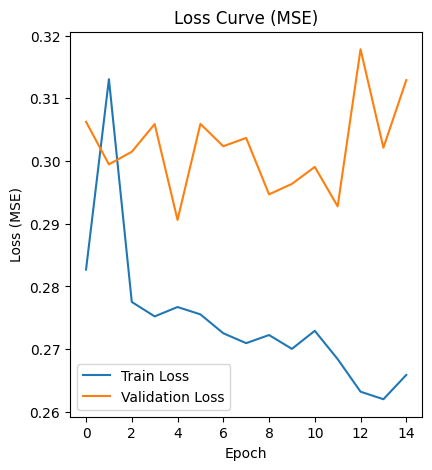

In [23]:
# 손실값 그래프
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5)) # 가로 10, 세로 5

# 학습/검즈 손실 그래프 생성
plt.subplot(1, 2, 1) # 1행 2열 중 첫 번째 그래프 사용
plt.plot(history.history["loss"], label="Train Loss") # 학습에 대한 손실값을 그래프로 표현
plt.plot(history.history["val_loss"], label="Validation Loss") # 검증에 대한 손실값을 그래프로 표현
plt.title("Loss Curve (MSE)")
plt.xlabel("Epoch") # X축은 Epoch(학습 반복 횟수)
plt.ylabel("Loss (MSE)") # Y축은 손실값(MSE)
plt.legend() # 범례 표시

***오우,, 팍팍 튀고 난리났네유***

### 9-2. 학습/검증 MAE 그래프

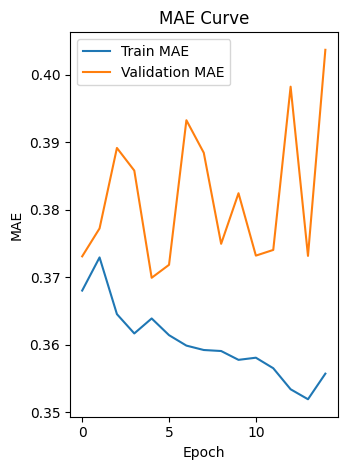

In [24]:
# 실제값 vs 예측값 비교 그래프(시각화)
# MAE : 실제값과 예측값과의 평균 오차를 의미

plt.subplot(1, 2, 2) # 1행 2열 중 두 번째 그래프 사용
plt.plot(history.history["mae"], label="Train MAE") # 학습에 대한 MAE값을 그래프로 표현
plt.plot(history.history["val_mae"], label="Validation MAE") # 검증에 대한 MAE값을 그래프로 표현
plt.title("MAE Curve")
plt.xlabel("Epoch") # X축은 Epoch(학습 반복 횟수)
plt.ylabel("MAE") # Y축은 MAE
plt.legend() # 범례 표시

plt.tight_layout() # 간격을 자동으로 보기 좋게 맞춰줌
plt.show()

### 9-3. 실제값 vs 예측값 비교

129/129 [==============================] - 0s 2ms/step


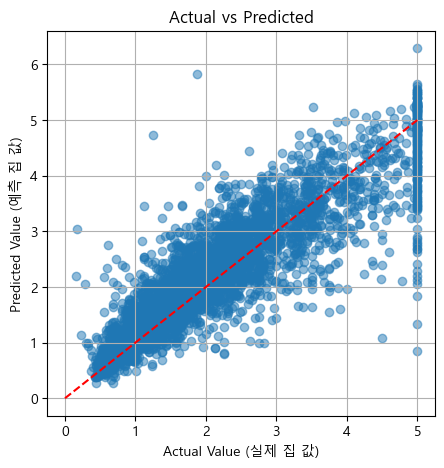

In [26]:
plt.rcParams["font.family"] = "Malgun Gothic" # 한글 폰트 지정
plt.rcParams["axes.unicode_minus"] = False # 마이너스 부호 깨짐 방지

plt.figure(figsize= (5, 5))
plt.scatter(y_test, model.predict(X_test), alpha= 0.5)
# 실제 집 값(y_test)을 x축에 두고. 예측 집 값을 y축에 두어 산점도로 그리기
# alpha=0.5 점의 투명도를 50%로 설정(겹치는 부분을 보기 쉽게 하기 위해)


plt.plot([0, 5], [0, 5], color="red", linestyle="--") 
# 예측 = 실제인 경우에 직선(대각선)을 그리기
# 모델이 정확하다면 모든 점이 이 직선 근방에 위치해야 함

plt.title("Actual vs Predicted")
plt.xlabel("Actual Value (실제 집 값)")
plt.ylabel("Predicted Value (예측 집 값)")
plt.grid(True) # 격자 추가
plt.show()

-----

## 1. Tensorflow 이진 분류(Binary Classification) 영화 리뷰

### 1-1. IMDB 데이터 로드

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences # 다양한 리뷰 텍스트의 길이를 동일하도록 잘라주는 모듈

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000) # 가장 많이 등장하는 단어 1만 개를 정수 형태로 갖고옴
print(x_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

### 1-2. 시퀀스 패팅

In [4]:
max_len = 200 # 모든 리뷰 길이를 200 단어로 길이를 통일
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

### 1-3. 텍스트 분류 모델 정의

In [5]:
model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=32, input_length=max_len),
    # 정수 인덱스를 32차원으로 임베딩(단어 하나하나 input 해줌) 벡터로 변환 후 단어의 의미를 벡터 공간에 넣어줌
    # input_dim == 단어 사전의 크기(10,000), output_div == 임베딩 차원수(32개)를 의미

    layers.LSTM(32),
    # LSTM 레이어는 문장 안에서 순서 정보를 학습
    # 문맥(context)을 고려해서 감정의 특징을 더 정확하게 학습 가능하게 함

    layers.Dense(1, activation="sigmoid")
    # 출력층은 하나의 노드이고, 0~1 사이 확률을 반환하게 되므로 sigmoid 활성화를 사용함
    # 0.5 기준으로 긍정/부정을 판별해주는 코드
])

### 1-4. 모델 컴파일

In [6]:
model.compile(
    optimizer = "adam", # 성능이 좋아서 가장 많이 사용되는 옵티마이저
    loss = "binary_crossentropy", # 0 or 1 분류 문제이므로 binary crossentropy(이진 분류) 손실 함수 사용
    metrics =["accuracy"] # 학습 성능을 accuracy(정확도) 기준으로 평가
)

### 1-5. 모델 학습

In [7]:
history = model.fit(
    x_train, y_train, # 학습 데이터(입력 문자 + 정답 라벨)
    epochs = 3, # 전체 데이터를 3번 반복 학습
    batch_size = 64, # 한 번에 64개의 리뷰를 읽고 가중치 업데이트
    validation_split = 0.2 # 학습 데이터의 20%를 검증용으로 사용해서 과적합 여부 평가
)

Epoch 1/3
313/313 [==============================] - 28s 80ms/step - loss: 0.4566 - accuracy: 0.7819 - val_loss: 0.3089 - val_accuracy: 0.8710
Epoch 2/3
313/313 [==============================] - 24s 78ms/step - loss: 0.2455 - accuracy: 0.9054 - val_loss: 0.3033 - val_accuracy: 0.8712
Epoch 3/3
313/313 [==============================] - 25s 80ms/step - loss: 0.1806 - accuracy: 0.9351 - val_loss: 0.3309 - val_accuracy: 0.8700


### 1-6. TEST 데이터 평가

In [8]:
acc = model.evaluate(x_test, y_test)[1] # 테스트 셋으로만 모델 평가하고 accuracy를 계산
print("Test Accuracy: ", acc) # 최종 테스트 정확도 출력

782/782 [==============================] - 17s 21ms/step - loss: 0.3506 - accuracy: 0.8638
Test Accuracy:  0.8637999892234802


### 1-7. 예측 수행

In [10]:
pred = model.predict(x_test[:3]) # 테스트 데이터 중 앞 3개 리뷰에 대해 예측 수행
print("예측 확률 : \n", pred) # 각 리뷰가 긍정일 확률(0~1 사이 값)을 출력
print("예측 결과 : \n", (pred > 0.5).astype(int))
# 0.5보다 크면 1(긍정), 작으면 0(부정)으로 바꿔서 최종 예측 레이블을 만듦

1/1 [==============================] - 0s 41ms/step
예측 확률 : 
 [[0.18920209]
 [0.9832854 ]
 [0.2746124 ]]
예측 결과 : 
 [[0]
 [1]
 [0]]


### 1-8. 학습 과정 시각화 (Loss와 Accuracy 그래프)

In [ ]:
plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss") # 학습 데이터 손실
plt.plot(history.history["val_loss"], label="Validation Loss") # 검증 데이터 손실
plt.title("Loss Curve (Binary Crossentropy)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend() # 범례

#--------------------------------------------------------------
# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy") # 학습 정확도
plt.plot(history.history["val_accuracy"], label="Validation Accuracy") # 검증 정확도
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

### 1-9. 예측 결과 시각화(막대 그래프)

In [ ]:
pred_probs = pred.reshape(-1)

plt.figure(figsize=(7, 4))
plt.bar([1, 2, 3], pred_probs)
plt.axhline(0.5, color="red", linestyle="--")
plt.xticks([1, 2, 3], ["Review 1", "Review 2", "Review 3"])
plt.ylim(0, 1)
plt.title("Sentiment Prediction Probablilty (0=부정, 1=긍정)")
plt.ylabel("Probability")
plt.show()